In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Number Plate Detecting

In [2]:
def display(img):
    plt.figure(figsize = (10,8))
    plt.imshow(img)

In [3]:
img = cv2.imread('car.jpg')

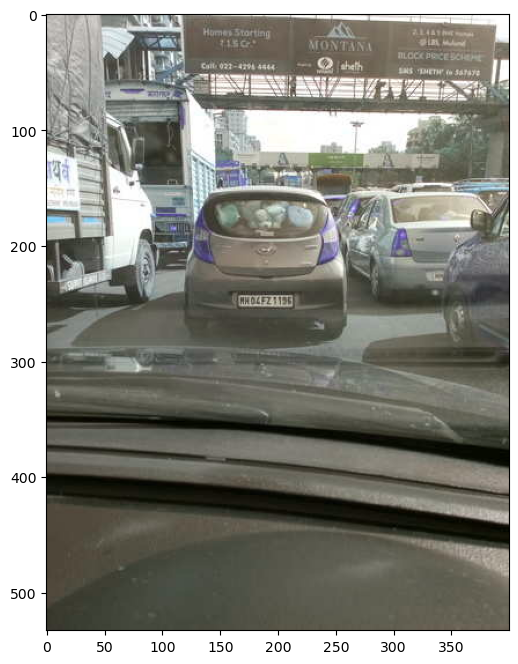

In [4]:
display(img)

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

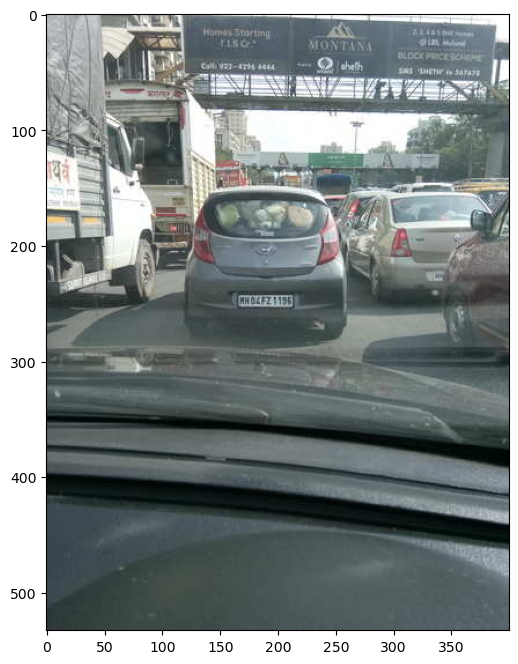

In [6]:
display(img)

In [7]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [8]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors = 4) 
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 3) 
    return plate_img

In [9]:
result = detect_plate(img)

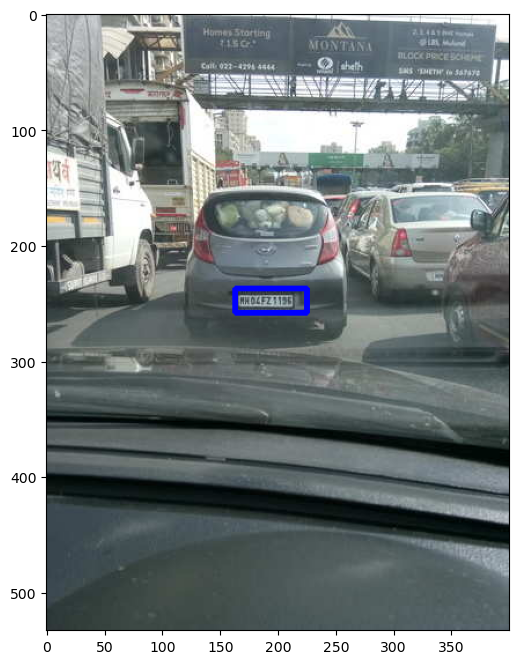

In [10]:
display(result)

Number Plate Blurring

In [11]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors=4) 
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [12]:
result = detect_and_blur_plate(img)

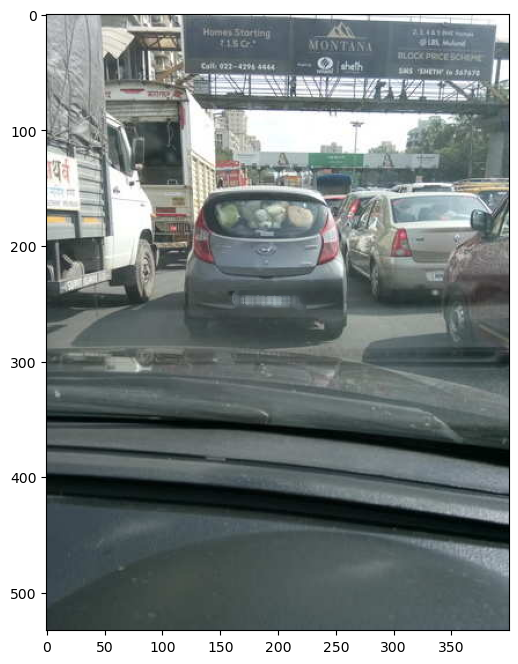

In [13]:
display(result)